<a href="https://colab.research.google.com/github/Rieesteves/GRIP-TASK/blob/main/TASK_2_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
# Load the iris dataset
data = pd.read_csv('/content/Iris.csv')
data.shape

(150, 6)

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
column_name = 'Species'
unique_values = data[column_name].unique()
print(f"Unique values in the '{column_name}' column:")
print(unique_values)

Unique values in the 'Species' column:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Use the features for clustering (excluding the target column)
X = data.iloc[:, :-1].values
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

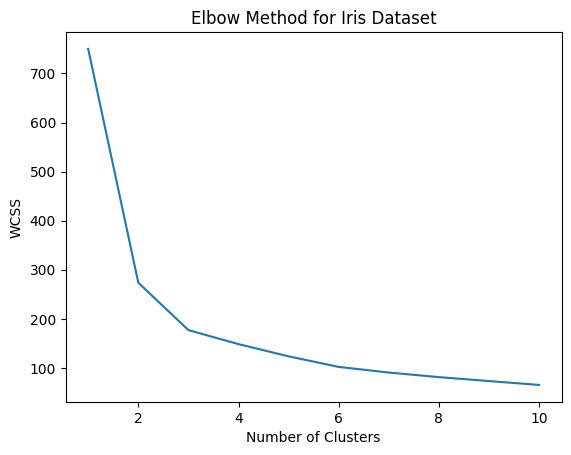

In [ ]:
# Apply the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster-Sum-of-Squares"
plt.show()

In [ ]:
# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


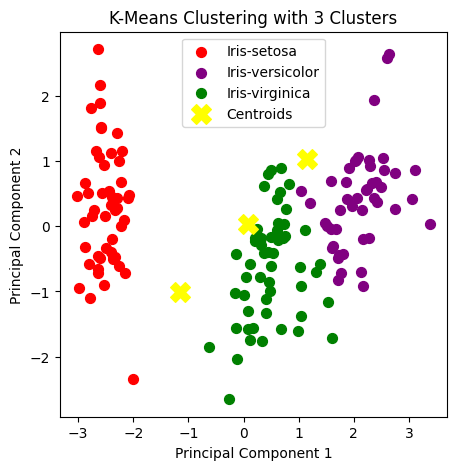

In [ ]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Reduce the dimensionality for 2D visualization using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Plot the clustered data in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X_2d[y_kmeans == 0, 0], X_2d[y_kmeans == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X_2d[y_kmeans == 1, 0], X_2d[y_kmeans == 1, 1], s=50, c='purple', label='Iris-versicolor')
plt.scatter(X_2d[y_kmeans == 2, 0], X_2d[y_kmeans == 2, 1], s=50, c='green', label='Iris-virginica')


# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')

plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


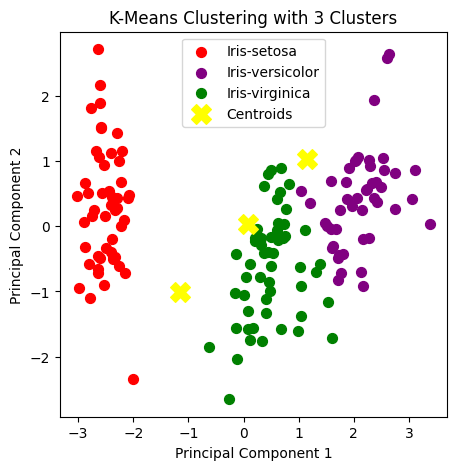

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SepalLengthCm
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['SepalLengthCm'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering with 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Reduce the dimensionality for 2D visualization using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Plot the clustered data in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X_2d[y_kmeans == 0, 0], X_2d[y_kmeans == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X_2d[y_kmeans == 1, 0], X_2d[y_kmeans == 1, 1], s=50, c='purple', label='Iris-versicolor')
plt.scatter(X_2d[y_kmeans == 2, 0], X_2d[y_kmeans == 2, 1], s=50, c='green', label='Iris-virginica')


# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')

plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

